머신러닝

In [3]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [6]:
#Create a constant op
#This op is added as a nod to the default graph
hello = tf.constant("Hello, TensorFlow")

# #seart a TF session
sess = tf.Session()

# # run the op and get rulest
print(sess.run(hello))

#그래프를 실행하기 위해 세션을 만들고 sess.run 함수로 실행
#b는 나오는거 걱정 x 

b'Hello, TensorFlow'


In [7]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) #also tf.float32 implicitly
node3 = tf.add(node1, node2) #node3 = node1 +node2 이렇게도 가능

In [8]:
print("node1:", node1, "node2:", node2)
print("node3:", node3)
# 이렇게 그냥 출력하면 출력의 결과는 '이것은 이러한 형태의 그래프야'
# 라고 출력이 된다.(애초에 그래프니깐)

node1: Tensor("Const_2:0", shape=(), dtype=float32) node2: Tensor("Const_3:0", shape=(), dtype=float32)
node3: Tensor("Add:0", shape=(), dtype=float32)


In [10]:
#그래서 결과값을 나오게 하려면
sess = tf.Session()  #우선 세션을 만든다
print("sses.run(node1, node2):", sess.run([node1, node2])) #그리고 sess.run으로 그래프를 실행시킨다.
print("sess.run(node3):", sess.run(node3))

sses.run(node1, node2): [3.0, 4.0]
sess.run(node3): 7.0


 요약하면
 1. 그래프를 빌드해주고
 2. sess.run() 세션을 만들고
 3. output

In [13]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b # + provides a shortcut for tf.add(a, b)

print(sess.run(adder_node, feed_dict= {a:3, b:4.5}))
print(sess.run(adder_node, feed_dict= {a:[1,3],b:[2,4]}))

7.5
[3. 7.]


#Tensor Ranks, Shapes, and Types
#Ranks(=몇차원 array)
 Ranks shape
 0차원  []                 : Scalar    / s =483
 1차원  [5]                : Vector    / v =[1.1, 2.2, 3.3]
 2차원  [3,4]              : Matrix    / m =[[1,2,3],[4,5,6],[7,8,9]]
 3차원  [1,4,3]            : 3-Tensor  / t =[[[2], [4],[6], [8], [10],[12], [14], [16], [18]]]
 n차원  [DO,D1,..Dn-1]     : n-Tensor  / ......

# Linear regression

In [14]:
import tensorflow as tf
X_train = [1,2,3]
Y_train = [1,2,3]

w = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = X_train * w + b

cost = tf.reduce_mean(tf.square(hypothesis-Y_train))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01) 
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())  # 앞에서 Variable 해줬기 때문에 사용하는 코드

for step in range(2001):
    sess.run(train) #train을 빌딩한다 = 밑에있는 cost,hypothesis, w, b 값 모두 빌딩하는것
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(w), sess.run(b))
        
          
# h(x) = wx + b 이니깐 w는 1이 b는 0이 나와야함

0 9.288587 [0.38785022] [-1.7821549]
20 0.2914691 [1.4200197] [-1.2570025]
40 0.19087256 [1.4958235] [-1.1558986]
60 0.172684 [1.4816192] [-1.0975736]
80 0.15682818 [1.459851] [-1.0456105]
100 0.14243387 [1.4383224] [-0.99643433]
120 0.12936077 [1.4177306] [-0.9496022]
140 0.1174875 [1.3980995] [-0.90497404]
160 0.106703974 [1.3793902] [-0.86244345]
180 0.096910246 [1.3615602] [-0.82191175]
200 0.08801544 [1.3445683] [-0.7832849]
220 0.07993702 [1.3283749] [-0.7464733]
240 0.07260007 [1.3129425] [-0.71139175]
260 0.06593653 [1.2982353] [-0.677959]
280 0.059884656 [1.2842194] [-0.6460974]
300 0.054388206 [1.2708621] [-0.61573327]
320 0.049396235 [1.2581326] [-0.58679605]
340 0.044862453 [1.2460012] [-0.55921894]
360 0.040744774 [1.2344402] [-0.5329376]
380 0.037005108 [1.2234225] [-0.5078916]
400 0.03360861 [1.2129223] [-0.48402247]
420 0.030523876 [1.2029157] [-0.46127522]
440 0.027722282 [1.1933795] [-0.439597]
460 0.02517782 [1.1842916] [-0.4189376]
480 0.022866897 [1.1756303] [-0.39

# Linear Regression with placeholers
(learning_rate 가 뭔지 설명하는 글 https://aileen93.tistory.com/71)

In [11]:
# Placeholders를 이용해보기
import tensorflow as tf
# X_train = [1,2,3]
# Y_train = [1,2,3]
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

w = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = X * w + b

cost = tf.reduce_mean(tf.square(hypothesis-Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer()) # 앞에서 Variable 해줬기 때문에 사용하는 코드

# for step in range(2001):
#     sess.run(train)
#     if step % 20 == 0:
#         print(step, sess.run(cost), sess.run(w), sess.run(b))
for step in range(2001):
    cost_val, w_val, b_val,_ =\
        sess.run([cost, w, b, train],
                feed_dict = {X: [1,2,3], Y: [1,2,3]})
    if step % 20 == 0:
        print(step, cost_val, w_val, b_val)

          
# h(x) = wx + b 이니깐 w는 1이 b는 0이 나와야함

0 83.31692 [-2.8915806] [0.31014252]
20 1.1274366 [-0.00984592] [1.4827932]
40 0.34810197 [0.2945952] [1.5261543]
60 0.31002393 [0.35221636] [1.4651948]
80 0.28151318 [0.38498986] [1.3973608]
100 0.25567412 [0.41411495] [1.3317875]
120 0.23220737 [0.44167057] [1.2692076]
140 0.21089439 [0.46791208] [1.2095604]
160 0.19153778 [0.49291837] [1.1527158]
180 0.1739577 [0.5167493] [1.0985425]
200 0.15799119 [0.5394603] [1.0469149]
220 0.14349012 [0.56110394] [0.9977139]
240 0.13031997 [0.58173054] [0.950825]
260 0.11835876 [0.60138756] [0.90613973]
280 0.10749525 [0.62012094] [0.8635544]
300 0.09762892 [0.63797385] [0.8229705]
320 0.08866813 [0.6549877] [0.7842939]
340 0.080529876 [0.671202] [0.7474351]
360 0.073138565 [0.68665427] [0.7123085]
380 0.06642561 [0.7013803] [0.67883277]
400 0.06032877 [0.71541446] [0.64693004]
420 0.05479158 [0.7287889] [0.61652666]
440 0.049762577 [0.74153477] [0.58755225]
460 0.045195136 [0.75368166] [0.55993944]
480 0.041047003 [0.76525766] [0.5336243]
500 0.

경사도를 구하는 것을 미분

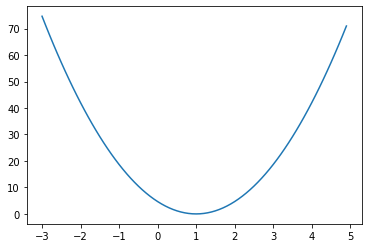

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)
hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis-Y))
sess = tf.Session()
sess.run(tf.global_variables_initializer())

W_val = []
cost_val = []
for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict = {W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    
plt.plot(W_val, cost_val)
plt.show()

In [7]:
import tensorflow as tf
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name = 'weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X *W

# Cost/Loss function
cost = tf.reduce_sum(tf.square(hypothesis-Y))

# Minimize: Gradient Descent using derivative: W  -= Learning_rate *derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y)* X)
descent = W - learning_rate * gradient
update = W.assign(descent)

# Launch the grapg in a session.
sess = tf.Session()
# Initializes global variables in thr graph
sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update, feed_dict = {X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict = {X: x_data, Y: y_data}), sess.run(W))


0 2.6227012 [0.56717694]
1 0.7460127 [0.76916105]
2 0.21219918 [0.8768859]
3 0.060358785 [0.93433917]
4 0.017168712 [0.9649809]
5 0.004883574 [0.9813231]
6 0.0013890967 [0.990039]
7 0.0003951302 [0.99468744]
8 0.00011239151 [0.99716663]
9 3.197086e-05 [0.99848884]
10 9.094893e-06 [0.999194]
11 2.5870193e-06 [0.99957013]
12 7.355463e-07 [0.99977076]
13 2.0918417e-07 [0.99987775]
14 5.9481593e-08 [0.9999348]
15 1.696344e-08 [0.9999652]
16 4.8040825e-09 [0.99998146]
17 1.3635173e-09 [0.9999901]
18 3.9587533e-10 [0.9999947]
19 1.0887291e-10 [0.9999972]
20 3.1622704e-11 [0.9999985]


# Multivariable linear regression(멀티베리어블 경우 실제 데이터를 적용해서 다뤄볼 수 있음)

In [10]:
import tensorflow as tf

x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

# Placeholders for a tensor that will be always fed.
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

Y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name = 'weight1')
w2 = tf.Variable(tf.random_normal([1]), name = 'weight2')
w3 = tf.Variable(tf.random_normal([1]), name = 'weight3')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 +b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                  feed_dict = {x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})
    if step % 10 == 0:
        print(step, "cost: ", cost_val, "\n Prediction:\n", hy_val)

0 cost:  4428.6885 
 Prediction:
 [ 98.93816  109.53171  113.08899  120.74727   82.903786]
10 cost:  18.047108 
 Prediction:
 [157.67108 180.15533 182.6595  196.50983 136.77786]
20 cost:  17.911236 
 Prediction:
 [157.8324  180.38019 182.86491 196.73558 136.95541]
30 cost:  17.816364 
 Prediction:
 [157.81657 180.39204 182.86052 196.73282 136.97044]
40 cost:  17.722023 
 Prediction:
 [157.80026 180.40321 182.85551 196.72937 136.98495]
50 cost:  17.628138 
 Prediction:
 [157.78398 180.41435 182.8505  196.72592 136.99942]
60 cost:  17.534653 
 Prediction:
 [157.76775 180.4255  182.8455  196.72249 137.01387]
70 cost:  17.44181 
 Prediction:
 [157.75154 180.43657 182.84052 196.71906 137.02824]
80 cost:  17.349358 
 Prediction:
 [157.73538 180.44762 182.83553 196.71564 137.04262]
90 cost:  17.257513 
 Prediction:
 [157.71928 180.45863 182.83057 196.71225 137.05693]
100 cost:  17.166134 
 Prediction:
 [157.70322 180.46964 182.82564 196.70885 137.0712 ]
110 cost:  17.07521 
 Prediction:
 [157

1030 cost:  10.506793 
 Prediction:
 [156.38359 181.3726  182.4191  196.43153 138.2421 ]
1040 cost:  10.4519 
 Prediction:
 [156.37112 181.38112 182.41525 196.42892 138.25313]
1050 cost:  10.39722 
 Prediction:
 [156.35867 181.38963 182.41142 196.42632 138.26414]
1060 cost:  10.342865 
 Prediction:
 [156.34628 181.39813 182.4076  196.42374 138.27513]
1070 cost:  10.2888775 
 Prediction:
 [156.33392 181.40659 182.4038  196.42117 138.28607]
1080 cost:  10.235085 
 Prediction:
 [156.3216  181.41504 182.4     196.41858 138.29701]
1090 cost:  10.181647 
 Prediction:
 [156.3093  181.42343 182.3962  196.41602 138.3079 ]
1100 cost:  10.128407 
 Prediction:
 [156.29701 181.43184 182.3924  196.41345 138.31877]
1110 cost:  10.075548 
 Prediction:
 [156.28477 181.4402  182.38863 196.41089 138.32959]
1120 cost:  10.022908 
 Prediction:
 [156.27257 181.44856 182.38487 196.40837 138.34041]
1130 cost:  9.970617 
 Prediction:
 [156.2604  181.45688 182.38112 196.40584 138.35118]
1140 cost:  9.918573 
 P

위에처럼 하면 data가 100개일때 다 일일이 코드를 칠 수 없음 그래서 이때 matrix(행렬)을 사용한다.

In [11]:
import tensorflow as tf
x_data = [[73., 80., 75.],[93., 88., 93.],[89., 91., 90.],[96., 98., 100.],[73., 66., 70.]]
y_data = [[152.],[185.],[180.],[196.],[142.]]
# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape = [None, 3])
Y = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

# hypothesis
hypothesis = tf.matmul(X, W) + b # tf.matmul은 행렬곱
# simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)

# launch the graph in a session.
sess = tf.Session()
# initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict = {X: x_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  79349.06 
Prediction:
 [[ -99.58818]
 [-115.0349 ]
 [-115.68413]
 [-126.0509 ]
 [ -86.65231]]
10 Cost:  1.3783334 
Prediction:
 [[149.6006 ]
 [184.46672]
 [179.42241]
 [195.31229]
 [141.79118]]
20 Cost:  0.6497844 
Prediction:
 [[150.35706]
 [185.37125]
 [180.31609]
 [196.28506]
 [142.48027]]
30 Cost:  0.64763695 
Prediction:
 [[150.36182]
 [185.37228]
 [180.31955]
 [196.28842]
 [142.48026]]
40 Cost:  0.64550805 
Prediction:
 [[150.3643 ]
 [185.3706 ]
 [180.32034]
 [196.28886]
 [142.47815]]
50 Cost:  0.6433898 
Prediction:
 [[150.36678]
 [185.36891]
 [180.3211 ]
 [196.28929]
 [142.47606]]
60 Cost:  0.641288 
Prediction:
 [[150.36925]
 [185.36723]
 [180.3219 ]
 [196.28973]
 [142.47398]]
70 Cost:  0.6391976 
Prediction:
 [[150.3717 ]
 [185.36559]
 [180.32266]
 [196.29016]
 [142.4719 ]]
80 Cost:  0.6371194 
Prediction:
 [[150.37415]
 [185.3639 ]
 [180.32343]
 [196.29057]
 [142.46982]]
90 Cost:  0.6350526 
Prediction:
 [[150.37659]
 [185.36224]
 [180.3242 ]
 [196.291  ]
 [142.4677

950 Cost:  0.4925533 
Prediction:
 [[150.56439]
 [185.23463]
 [180.38315]
 [196.3225 ]
 [142.30974]]
960 Cost:  0.4912451 
Prediction:
 [[150.56635]
 [185.23332]
 [180.38377]
 [196.32278]
 [142.30814]]
970 Cost:  0.4899567 
Prediction:
 [[150.56825]
 [185.232  ]
 [180.38437]
 [196.32309]
 [142.30649]]
980 Cost:  0.4886631 
Prediction:
 [[150.5702 ]
 [185.23068]
 [180.385  ]
 [196.32343]
 [142.3049 ]]
990 Cost:  0.48737937 
Prediction:
 [[150.57213]
 [185.22939]
 [180.38559]
 [196.32373]
 [142.30328]]
1000 Cost:  0.48609838 
Prediction:
 [[150.57407]
 [185.22809]
 [180.3862 ]
 [196.32405]
 [142.3017 ]]
1010 Cost:  0.48483604 
Prediction:
 [[150.57596]
 [185.22676]
 [180.3868 ]
 [196.32436]
 [142.30008]]
1020 Cost:  0.48356986 
Prediction:
 [[150.57788]
 [185.22548]
 [180.3874 ]
 [196.32466]
 [142.2985 ]]
1030 Cost:  0.48231015 
Prediction:
 [[150.57979]
 [185.22418]
 [180.388  ]
 [196.32497]
 [142.29689]]
1040 Cost:  0.48106393 
Prediction:
 [[150.58168]
 [185.22289]
 [180.3886 ]
 [196.

1840 Cost:  0.39962834 
Prediction:
 [[150.71875]
 [185.12997]
 [180.43188]
 [196.34642]
 [142.18198]]
1850 Cost:  0.39880428 
Prediction:
 [[150.72032]
 [185.12895]
 [180.4324 ]
 [196.34666]
 [142.18074]]
1860 Cost:  0.39799327 
Prediction:
 [[150.72182]
 [185.12787]
 [180.43285]
 [196.34685]
 [142.17946]]
1870 Cost:  0.39718857 
Prediction:
 [[150.72336]
 [185.12685]
 [180.43335]
 [196.3471 ]
 [142.17822]]
1880 Cost:  0.39638138 
Prediction:
 [[150.72487]
 [185.1258 ]
 [180.4338 ]
 [196.3473 ]
 [142.17696]]
1890 Cost:  0.3955833 
Prediction:
 [[150.7264 ]
 [185.12477]
 [180.43431]
 [196.34753]
 [142.1757 ]]
1900 Cost:  0.39477983 
Prediction:
 [[150.72794]
 [185.12376]
 [180.4348 ]
 [196.34776]
 [142.17448]]
1910 Cost:  0.3939887 
Prediction:
 [[150.72945]
 [185.12273]
 [180.43527]
 [196.34799]
 [142.17325]]
1920 Cost:  0.39320546 
Prediction:
 [[150.73094]
 [185.1217 ]
 [180.43576]
 [196.34819]
 [142.172  ]]
1930 Cost:  0.39241537 
Prediction:
 [[150.73247]
 [185.1207 ]
 [180.43623]

# Logistic(regression) Classification

In [6]:
import tensorflow as tf
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]] # 0 은 fail, 1 은 pass

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape = [None, 2])
Y = tf.placeholder(tf.float32, shape = [None, 1])
W = tf.Variable(tf.random_normal([2, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')
# hypothesisy using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X,W)))
hypothesis = tf.sigmoid(tf.matmul(X, W)+b)
# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1- Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# Accuracy computation
# True if hypothesis > 0.5 else False
predicted = tf.cast(hypothesis >0.5 , dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        cost_val,_ = sess.run([cost, train], feed_dict= {X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)
    
    h, c, a= sess.run([hypothesis, predicted, accuracy], feed_dict= {X:x_data,Y:y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

0 2.7928755
200 0.6353347
400 0.60983324
600 0.5876545
800 0.56629825
1000 0.54576993
1200 0.52607006
1400 0.5071941
1600 0.48913276
1800 0.47187248
2000 0.45539585
2200 0.43968198
2400 0.4247073
2600 0.4104463
2800 0.3968716
3000 0.38395497
3200 0.37166724
3400 0.3599795
3600 0.34886253
3800 0.33828768
4000 0.3282268
4200 0.31865284
4400 0.3095392
4600 0.3008609
4800 0.2925935
5000 0.28471416
5200 0.27720076
5400 0.27003282
5600 0.26319054
5800 0.25665554
6000 0.2504104
6200 0.24443848
6400 0.23872454
6600 0.23325408
6800 0.22801358
7000 0.22299021
7200 0.21817203
7400 0.21354793
7600 0.20910738
7800 0.20484054
8000 0.20073813
8200 0.19679146
8400 0.19299255
8600 0.18933369
8800 0.18580782
9000 0.18240815
9200 0.17912847
9400 0.17596276
9600 0.17290561
9800 0.16995168
10000 0.16709615

Hypothesis:  [[0.0384752 ]
 [0.16816539]
 [0.339973  ]
 [0.76577187]
 [0.92931575]
 [0.9767899 ]] 
Correct (Y):  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1.0


# softmax Classification

In [11]:
import tensorflow as tf
x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5],[1, 7, 5, 5],[1, 2, 5, 6],[1, 6, 6, 6],[1, 7, 7, 7]]
y_data = [[0, 0, 1],[0, 0, 1],[0, 0, 1],[0, 1, 0],[0, 1, 0,],[0, 1, 0],[1, 0, 0],[1, 0, 0 ]]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([4, nb_classes]), name = "weight")
b = tf.Variable(tf.random_normal([nb_classes]), name = "bias")

# tf.nn.softmax computes softmax activations
# softmax = exp(Logits) / reduce_sum(exp(Logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/Loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        sess.run(optimizer, feed_dict={X:x_data, Y:y_data})
        if step % 200 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))

0 4.372783
200 0.53314674
400 0.4342449
600 0.35606107
800 0.28073943
1000 0.23565112
1200 0.21317962
1400 0.19455725
1600 0.17885546
1800 0.16543518
2000 0.15383619


In [3]:
# # 위에것을 fancy하게 구현하기(다른데이터사용)
# #파일불러오는 거 가정해서하는것
# xy = np.loadtxt('data-04-zoo.csv', delimiter = ',', dtype= np.float32)
# x_data = xy[:,0:-1]
# y_data = xy[:,[-1]]

# nb_classes = 7

# X = tf.placeholder(tf.float32, [None, 16])
# Y = tf.placeholder(tf.int32, [None, 1]) #0 ~ 6

# Y_one_hot = tf.one_hot(Y, nb_classes)
# Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])

# W = tf.Variable(tf.random_normal([16, nb_classes]), name = 'weight')
# b = tf.Variable(tf.random_normal([nb_classes]), name = 'bias'

# # tf.nn.softmax computes softmax activations
# #softmax = exp(Logits) / reduce_sum(exp(Logits),dim)
# logits= tf.matmul(X, W) + b
# hypothesis = tf.nn.softmax(logits)

# # Cross entropy cost/Loss
# cost_i = tf.nn.softmax_cross_entropy_with_logits(logits= logits, labels = Y_one_hot)

# cost = tf.reduce_mean(cost_i)
# optimizer = tf.train.GradientDescentOptimizer(learning_rate =0.1).minimize(cost)

# prediction = tf.argmax(hypothesis, 1)
# correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot,1))
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
                
# # Launch graph
# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
    
#     for step in range(2000):
#         sess.run(optimizer, feed_dict = {X: x_data, Y: y_data})
#         if step % 100 ==0:
#             loss, acc = sess.run([cost, accuracy], feed_dict={X: x_data, Y:y_data})
#             print("step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))
    
#     # Let's see if we can predict            
#     pred = sess.run(prediction, feed_dict={X: x_data})
#     # y_dat: (N,1) = flatten => (N,) matches pred.shape
#     for p, y in zip(pred, y_data.flatten()):
#         prit("[{}] prediction: {} True Y:{}".format(p == int(y), p, int(y)))
                

SyntaxError: invalid syntax (<ipython-input-3-dda5b4dec856>, line 20)

# mnist

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

batch_xs, batch_ys = mnist.train.next_batch(100)

print("Accuracy: ", accuracy.eval(session = sess, feed_dict = {X:mnist.test.images, Y:mnist.test.labels}))


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


TypeError: read_data_sets() missing 1 required positional argument: 'train_dir'

# 딥러닝

In [13]:
# simple 1D array and slicing
import numpy as np
import pprint as pp # 출력물 좀 더 이쁘게 배열 해준다.

t = np.array([0., 1., 2., 3., 4., 5., 6.])
pp.pprint(t)
print(t.ndim) # rank(차원의 수)
print(t.shape) # shape
print(t[0], t[1], t[-1])
print(t[2:5])
print(t[:2])

array([0., 1., 2., 3., 4., 5., 6.])
1
(7,)
0.0 1.0 6.0
[2. 3. 4.]
[0. 1.]


In [73]:
# 2D array
import numpy as np
import pprint as pp
import tensorflow as tf

t = np.array([[1., 2., 3.],[4., 5., 6.], [7., 8., 9.],[10., 11., 12.]])
pp.pprint(t)
print(t.ndim)
print(t.shape)
t.reshape(4,1,3)



array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.]])
2
(4, 3)


array([[[ 1.,  2.,  3.]],

       [[ 4.,  5.,  6.]],

       [[ 7.,  8.,  9.]],

       [[10., 11., 12.]]])

In [ ]:
# 행렬곱 일반곱
import numpy as np
import pprint as pp
import tensorflow as tf
#행렬곱

matrix1 = tf.constant([[1., 2.],[3., 4.]])
matrix2 = tf.constant([[1.],[2.]])
print("Metrix 1 shape", matrix1.shape)
print("Metrix 2 shape", matrix2.shape)
tf.matmul(matrix1, matrix2).eval(session=sess)
#일반곱
(matrix1 * matrix2).eval(session=sess)

In [37]:
# Broadcasting(shape이 달라도 계산가능 1차원)
import numpy as np
import pprint as pp
import tensorflow as tf

matrix1 = tf.constant([[1.,2.]])
matrix2 = tf.constant(3.) # 이렇게 브로드캐스팅이용할 수 있지만 이왕이면 같은차원으로 하는게 가독성 좋다
(matrix1 + matrix2).eval(session=sess)

array([[4., 5.]], dtype=float32)

In [4]:
import numpy as np
import pprint as pp
import tensorflow as tf
sess = tf.Session()
# tf.reduce_mean([1,2], axis = 0).eval(session= sess) # float 이아니라 int여서 1로 출력
# >>>1
x= [[1., 2.],
    [3., 4.]]
#tf.reduce_mean(x, axis =0).eval(session=sess)
#tf.reduce_mean(x, axis =1).eval(session=sess)
#tf.reduce_mean(x, axis =-1).eval(session=sess) # axis = -1 가장안쪽에 있는것 평균

array([1.5, 3.5], dtype=float32)

# Reduce sum

In [9]:
import numpy as np
import pprint as pp
import tensorflow as tf
sess = tf.Session()

x = [[1.,2.],
     [3., 4.]]

# tf.reduce_sum(x).eval(session = sess)
# tf.reduce_sum(x, axis = 0).eval(session = sess)
# tf.reduce_sum(x, axis = -1).eval(session = sess)
# tf.reduce_mean(tf.reduce_sum(x, axis = -1)).eval(session = sess)

5.0

# Argmax

In [13]:
x = [[0, 1, 2],
     [2, 1, 0]]
# tf.argmax(x, axis = 0).eval(session = sess) # 축기준 멕시멈 값의 위치 출력
# tf.argmax(x, axis = 1).eval(session = sess)
# tf.argmax(x, axis = -1).eval(session = sess)


array([2, 0], dtype=int64)

# Reshape


In [21]:
import numpy as np
import pprint as pp
import tensorflow as tf
sess = tf.Session()

t = np.array([[[0, 1, 2],
               [3, 4, 5]],
             
             [[6, 7, 8],
              [9, 10, 11]]])
#pp.pprint(t)
# t.shape

# tf.reshape(t, shape = [-1, 3]).eval(session = sess)
# tf.reshape(t, shape = [-1, 1, 3]).eval(session = sess)

# reshape()의 '-1'이 의미하는 바는, 변경된 배열의 '-1' 위치의 차원은 "원래 배열의 길이와 남은 차원으로 부터 추정"이 된다는 뜻입니다.

# Reshape( squeeze, expand)
tf.squeeze([[0],[1],[2]]).eval(session = sess)
tf.expand_dims([0, 1, 2],1).eval(session = sess)

array([[0],
       [1],
       [2]])

# One hot

In [24]:
import numpy as np
import pprint as pp
import tensorflow as tf
sess = tf.Session()

tf.one_hot([[0],[1],[2],[0]], depth = 3).eval(session = sess)
# 자동으로 rank하나를 expand함
#그게 싫으면 reshape하면된다.
# t = tf.one_hot([[0],[1],[2],[0]], depth = 3)
# tf.reshape(t,shape = [-1, 3]).eval(session = sess)

array([[[1., 0., 0.]],

       [[0., 1., 0.]],

       [[0., 0., 1.]],

       [[1., 0., 0.]]], dtype=float32)

# Casting

In [26]:
import numpy as np
import pprint as pp
import tensorflow as tf
sess = tf.Session()

tf.cast([1.8, 2.2, 3.3, 4.9], tf.int32).eval(session = sess) #주어진 tensor를 int로 바꿈
tf.cast([True, False, 1 == 1, 0 ==1], tf.int32).eval(session = sess) # 불리안을 0이나 1로 바꿈


array([1, 0, 1, 0])

# Stack

In [28]:
import numpy as np
import pprint as pp
import tensorflow as tf
sess = tf.Session()

#stack 은 쌓는다는 의미

x = [1, 4]
y = [2, 5]
z = [3, 6]

#pack along first dim.
tf.stack([x, y, z]).eval(session = sess)
tf.stack([x, y, z], axis = 1).eval(session = sess) #축 기준으로 바꿔서 쌓음


array([[1, 2, 3],
       [4, 5, 6]])

# Ones and Zeros like

In [69]:
import numpy as np
import pprint as pp
import tensorflow as tf
sess = tf.Session()


x = [[0, 1, 2],
     [2, 1, 0]]

tf.ones_like(x).eval(session = sess)
tf.zeros_like(x).eval(session = sess)


array([[0, 0, 0],
       [0, 0, 0]])

# Zip

In [30]:
import numpy as np
import pprint as pp
import tensorflow as tf
sess = tf.Session()

for x, y in zip([1, 2, 3],[4, 5, 6]):
    print(x, y)
    
for x, y, z in zip([1, 2, 3],[4, 5, 6],[7, 8, 9]):
    print(x, y, z)

1 4
2 5
3 6
1 4 7
2 5 8
3 6 9


# XOR data set 

In [31]:
import numpy as np
import tensorflow as tf
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype = np.float32)
y_data = np.array([[0],    [1],    [1],    [0]], dtype = np.float32)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W = tf.Variable(tf.random_normal([2, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X,W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) +b)

# Cost/loss function
cost = -tf.reduce_mean(Y *tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

# Accuracy computation
# True if hypothesis > 0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize Tensorflow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict = {X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)
    

0 0.74922144 [[ 1.3445129 ]
 [-0.11669051]]
100 0.71248734 [[ 0.7768897 ]
 [-0.01649155]]
200 0.7003921 [[0.47027746]
 [0.04421406]]
300 0.6959808 [[0.28801355]
 [0.0600372 ]]
400 0.69430256 [[0.1785013 ]
 [0.05665189]]
500 0.69363457 [[0.11194577]
 [0.04684164]]
600 0.69335806 [[0.07098859]
 [0.03620718]]
700 0.69324005 [[0.04547017]
 [0.02688913]]
800 0.6931886 [[0.029384  ]
 [0.01945772]]
900 0.6931657 [[0.01913487]
 [0.0138321 ]]
1000 0.6931555 [[0.01254225]
 [0.00970943]]
1100 0.693151 [[0.00826623]
 [0.00675291]]
1200 0.69314885 [[0.00547294]
 [0.00466448]]
1300 0.69314796 [[0.00363716]
 [0.00320524]]
1400 0.6931476 [[0.00242456]
 [0.00219382]]
1500 0.6931473 [[0.00162025]
 [0.00149698]]
1600 0.6931473 [[0.00108491]
 [0.00101906]]
1700 0.6931472 [[0.00072764]
 [0.00069247]]
1800 0.6931472 [[0.0004887 ]
 [0.00046991]]
1900 0.6931472 [[0.00032853]
 [0.00031849]]
2000 0.69314724 [[0.00022104]
 [0.00021567]]
2100 0.6931472 [[0.0001488 ]
 [0.00014593]]
2200 0.6931472 [[1.0023104e-04]


데이터 셋 이 4개밖에 안되는데 accuracy가 0.5 밖에 안나옴...
이걸 되게 하려면 이때 뉴렬 넷 을 사용해야 한다.

In [1]:
import numpy as np
import tensorflow as tf
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype = np.float32)
y_data = np.array([[0],    [1],    [1],    [0]], dtype = np.float32)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W1= tf.Variable(tf.random_normal([2, 2]), name = 'weight1')
b1 = tf.Variable(tf.random_normal([2]), name = 'bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name = 'weight2')
b2 = tf.Variable(tf.random_normal([1]), name = 'bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

cost = -tf.reduce_mean(Y *tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

# Accuracy computation
# True if hypothesis > 0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize Tensorflow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run([W1, W2]))
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict = {X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)
    

0 0.7007551 [array([[-0.6693347, -0.6412805],
       [-1.435883 , -0.8319943]], dtype=float32), array([[ 0.8716725],
       [-0.3947619]], dtype=float32)]
100 0.6967011 [array([[-0.5422977 , -0.68333906],
       [-1.3703836 , -0.8723788 ]], dtype=float32), array([[ 0.7670027 ],
       [-0.45721236]], dtype=float32)]
200 0.6937382 [array([[-0.43765873, -0.7331414 ],
       [-1.3207431 , -0.919663  ]], dtype=float32), array([[ 0.69388866],
       [-0.52156913]], dtype=float32)]
300 0.6912619 [array([[-0.3511146 , -0.7918616 ],
       [-1.2834553 , -0.97490436]], dtype=float32), array([[ 0.6432176],
       [-0.5923993]], dtype=float32)]
400 0.68885297 [array([[-0.27887973, -0.8611088 ],
       [-1.2557226 , -1.0396543 ]], dtype=float32), array([[ 0.6096426 ],
       [-0.67219454]], dtype=float32)]
500 0.68618286 [array([[-0.21803847, -0.9424965 ],
       [-1.2355623 , -1.115565  ]], dtype=float32), array([[ 0.589435 ],
       [-0.7634761]], dtype=float32)]
600 0.6829666 [array([[-0.166441

5400 0.052108563 [array([[-3.9093733, -5.8439546],
       [-3.9271839, -5.9748054]], dtype=float32), array([[ 7.6270113],
       [-8.442874 ]], dtype=float32)]
5500 0.049793772 [array([[-3.9480379, -5.867807 ],
       [-3.9655156, -5.9956827]], dtype=float32), array([[ 7.7148232],
       [-8.513723 ]], dtype=float32)]
5600 0.04766173 [array([[-3.984925 , -5.8907104],
       [-4.002093 , -6.0157857]], dtype=float32), array([[ 7.7991567],
       [-8.582275 ]], dtype=float32)]
5700 0.045692608 [array([[-4.0201735, -5.9127316],
       [-4.037047 , -6.0351667]], dtype=float32), array([[ 7.880255],
       [-8.648663]], dtype=float32)]
5800 0.043869257 [array([[-4.0539055, -5.9339304],
       [-4.070504 , -6.0538716]], dtype=float32), array([[ 7.9583416],
       [-8.713006 ]], dtype=float32)]
5900 0.042176872 [array([[-4.086231 , -5.9543614],
       [-4.1025696, -6.0719423]], dtype=float32), array([[ 8.033617],
       [-8.775417]], dtype=float32)]
6000 0.04060233 [array([[-4.1172504, -5.97407

# multi layer

In [1]:
# W1 =tf.Variable(tf.random_uniform([2, 5], -1.0, 1.0), name = 'weight1')
# W2 =tf.Variable(tf.random_uniform([5, 5], -1.0, 1.0), name = 'weight2')
# W3 =tf.Variable(tf.random_uniform([5, 5], -1.0, 1.0), name = 'weight3')
# W4 =tf.Variable(tf.random_uniform([5, 5], -1.0, 1.0), name = 'weight4')
# W5 =tf.Variable(tf.random_uniform([5, 5], -1.0, 1.0), name = 'weight5')
# W6 =tf.Variable(tf.random_uniform([5, 5], -1.0, 1.0), name = 'weight6')
# W7 =tf.Variable(tf.random_uniform([5, 5], -1.0, 1.0), name = 'weight7')
# W8 =tf.Variable(tf.random_uniform([5, 5], -1.0, 1.0), name = 'weight8')
# W9 =tf.Variable(tf.random_uniform([5, 5], -1.0, 1.0), name = 'weight9')
# W10 =tf.Variable(tf.random_uniform([5, 5], -1.0, 1.0), name = 'weight10')
# W11 =tf.Variable(tf.random_uniform([5, 1], -1.0, 1.0), name = 'weight11')

# b1 = tf.Variable(tf.zeros([5]), name = 'Bias1')
# b2 = tf.Variable(tf.zeros([5]), name = 'Bias2')
# b3 = tf.Variable(tf.zeros([5]), name = 'Bias3')
# b4 = tf.Variable(tf.zeros([5]), name = 'Bias4')
# b5 = tf.Variable(tf.zeros([5]), name = 'Bias5')
# b6 = tf.Variable(tf.zeros([5]), name = 'Bias6')
# b7 = tf.Variable(tf.zeros([5]), name = 'Bias7')
# b8 = tf.Variable(tf.zeros([5]), name = 'Bias8')
# b9 = tf.Variable(tf.zeros([5]), name = 'Bias9')
# b10 = tf.Variable(tf.zeros([5]), name = 'Bias10')
# b11 = tf.Variable(tf.zeros([1]), name = 'Bias11')

# # Our hypothesis
# L1 = tf.sigmoid(tf.matmul(X, W1) + b1)
# L2 = tf.sigmoid(tf.matmul(L1, W2) + b2)
# L3 = tf.sigmoid(tf.matmul(L2, W3) + b3)
# L4 = tf.sigmoid(tf.matmul(L3, W4) + b4)
# L5 = tf.sigmoid(tf.matmul(L4, W5) + b5)
# L6 = tf.sigmoid(tf.matmul(L5, W6) + b6)
# L7 = tf.sigmoid(tf.matmul(L6, W7) + b7)
# L8 = tf.sigmoid(tf.matmul(L7, W8) + b8)
# L9 = tf.sigmoid(tf.matmul(L8, W9) + b9)
# L10 = tf.sigmoid(tf.matmul(L9, W10) + b10)

# hypothesis = tf.sigmoid(tf.matmul(L10, W11) + b11)


# # Hypothesis를 텐서보드로 시각화
# with tf.name_scope("layer1") as scope:
#     L1 = tf.sigmoid(tf.matmul(X, W1) + b1)
# :
# :
# :
# with tf.name_scope("last") as scope:
#     hypothesis= tf.sigmoid(tf.matul(L10,W11) +b11)
    


SyntaxError: invalid syntax (<ipython-input-1-17fdcc59c5a5>, line 43)

In [1]:
# #ReLU 
# L1 = tf.nn.relu(tf.matmul(X, W1)+ b1)

# #Sigmoid
# L1 = tf.sigmoid(tf.matmul(X, W1) + b1)

# CNN

(1, 3, 3, 1)
image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]
image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


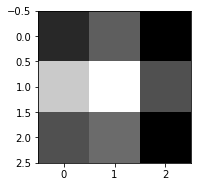

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap = 'Greys')


# weight값과stride 주고 통과시키기

print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides = [1, 1, 1,1],padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1),plt.imshow(one_img.reshape(2,2),cmap='gray')
    
    
#padding 이용하기
print("image.shape", image.shape)

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides= [1,1,1,1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap="gray")
    

In [6]:
# Max Pooling
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
image = np.array([[[[4],[3]],
                   [[2],[1]]]], dtype = np.float32)
pool = tf.nn.max_pool(image, ksize = [1, 2, 3, 1],
                     strides = [1, 1, 1, 1], padding = 'SAME')
print(pool.shape)
print(pool.eval())


(1, 2, 2, 1)
[[[[4.]
   [4.]]

  [[2.]
   [2.]]]]
